In [53]:
# Uncomment below  lines if  working  on google  colab
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [54]:
!pip install twitter
!pip install wordcloud
!pip install spacy
!pip install nltk

In [55]:
"""!pip  show requests
!pip  install  util"""

'!pip  show requests\n!pip  install  util'

In [56]:
#!pip  install  -U spacy

In [57]:
# LIBRARY TO WORK WITH TWITTER  API
#!pip install twitter
import twitter
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import unicodedata
from wordcloud import WordCloud
#import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#import sklearn
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Sushil
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
import pprint


In [59]:
STOP_WORDS.add("name")
STOP_WORDS.add("people")
STOP_WORDS.add("peopl")
STOP_WORDS.add("Im")
STOP_WORDS.add("ed")

In [60]:
CONSUMER_KEY = 'Ri9pFOQqXSnHm8p8IZj5QCw26'
CONSUMER_SECRET = 'hRrAioGsLbwWHp0fAmrCNZkbhOd2E3mRYeAQ6OUZlQD36y1jej'
OAUTH_TOKEN = '1258017464174219269-y9B2ac2711bcaYEHoSqi3qJ7RXGuMY'
OAUTH_TOKEN_SECRET = 'i8JW4em2QuH0e4H5Ahy9SYn0wXSBDaafDsZJrmweYc79Z'
auth = twitter.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)


In [61]:

WORLD_WOE_ID = 23424977
DL_WOE_ID = 20070458
world_trends = twitter_api.trends.place(_id = WORLD_WOE_ID)
delhi_trends = twitter_api.trends.place(_id = DL_WOE_ID)

In [62]:
# #hashtag counts   # why u did this?
def hashtag_count(x):
    hashtag=0
    word_list = x.split(' ')
    for word in word_list:
        if word.startswith('#'):
            hashtag+=1
    return hashtag


In [63]:
# mentions counts
def mention_count(x):
    mentions=0
    word_list = x.split(' ')
    for word in word_list:
        if word.startswith('@'):
            mentions+=1
    return mentions


In [64]:
# Average word length
def get_average_word_len(x):
    words_list = x.split(' ')
    word_len = 0
    for word in words_list:
        word_len+=len(word)
    return word_len/len(words_list)


In [65]:
# contractions to expansions
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"b'day" : "birthday",
"bday" : "birthday",
"don't" : "do not",
"dont" : "do not",
}

In [66]:
def cont_to_exp(x):
    if type(x)==str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
    return x

In [67]:
# stop word count
def stop_word_count(x):
    words_list = x.split(' ')
    count=0
    for word in words_list:
        if word in STOP_WORDS:
            count+=1
    return count

In [68]:
def get_email_count(x):
    return(len(re.findall(r'[a-zA-z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+',x )))

In [69]:
# remove emails 
def remove_email(x):
    return (re.sub(r'[a-zA-z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+',' ',x ))

In [70]:
# Remove urls
def remove_url(x):
    return (re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

In [71]:
# Remove accented characters
def remove_accented_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('ascii','ignore')
    return x

In [72]:
def remove_non_english(x):
    return(re.sub('[^a-zA-Z0-9,.~!$%^&#@*\n ]','',x))

In [73]:
def preprocessing(text_and_label):
    text_and_label['hashtag_count'] = text_and_label['text'].apply(hashtag_count)
    text_and_label['mentions_count'] = text_and_label['text'].apply(mention_count)
    text_and_label['word_counts'] = text_and_label['text'].apply(lambda x : len(str(x).split()))
    text_and_label['average_word_len'] = text_and_label['text'].apply(get_average_word_len)
    text_and_label['text'] = text_and_label['text'].apply(cont_to_exp)
    text_and_label['stopword_count'] = text_and_label['text'].apply(stop_word_count)
    text_and_label['text'] = text_and_label['text'].apply(lambda x: ' '.join([t for t in x.split(' ') if t not in STOP_WORDS]))
    text_and_label['email_counts'] = text_and_label['text'].apply(get_email_count)
    text_and_label['text'] = text_and_label['text'].apply(remove_email)
    text_and_label['text'] = text_and_label['text'].apply(remove_url)
    text_and_label['text'] = text_and_label['text'].apply(lambda x : re.sub('RT','',x))
    #text_and_label['text'] = text_and_label['text'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+','',x))
    text_and_label['text'] = text_and_label['text'].apply(lambda x: " ".join(x.split(' ')))
    text_and_label['text'] = text_and_label['text'].apply(remove_accented_chars)
    text = ' '.join(text_and_label['text'])
    text = text.split(' ')
    freq = pd.Series(text).value_counts()
    x = ' '.join(text)
    wc = WordCloud(width = 800, height = 400).generate(x)
    plt.imshow(wc)
    plt.axis('off')
    plt.imshow(wc)
    plt.axis('off')
    return (text_and_label)

In [74]:
# if working  on google colab
# df = pd.read_csv("/content/drive/MyDrive/Mini_Project/dataset/final_dataset_large.csv")
# else if working  on  jupyter notebook offline
df = pd.read_csv("../../Dataset/final_dataset_large.csv")

In [75]:
df.head()

,Emotion,Emotion_ID,text
0,anger,1,I'm really angry at Mom because she won't let ...
1,anger,1,Working But it's Fridaaaayyyyy
2,anger,1,Packing I don't like it..
3,anger,1,I tried to dye my hair and all i got was a blo...
4,anger,1,&quot;locked up abroad&quot; makes bein half b...


In [76]:
df.describe()

,Emotion_ID
count,178965.000000
mean,3.968787
std,1.956838
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,7.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178965 entries, 0 to 178964
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Emotion     178965 non-null  object
 1   Emotion_ID  178965 non-null  int64 
 2   text        178965 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [78]:
df['Emotion'].value_counts()

Happy       30885
sad         27538
anger       27119
Fear        24999
Neutral     24999
Disgust     21916
surprise    21509
Name: Emotion, dtype: int64

In [79]:
df = df[df['text'].duplicated()==False]

In [80]:
df = df.reset_index(drop = True)

(array([21251., 17997., 23883., 22249., 20162., 18003.,  6322.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 7 artists>)

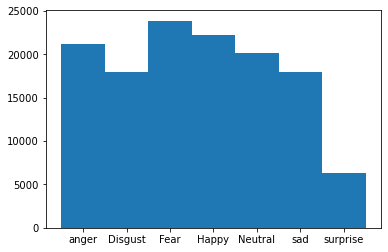

In [81]:
plt.hist(df['Emotion'], bins = range(8), align='left')

In [82]:
df

,Emotion,Emotion_ID,text
0,anger,1,I'm really angry at Mom because she won't let ...
1,anger,1,Working But it's Fridaaaayyyyy
2,anger,1,Packing I don't like it..
3,anger,1,I tried to dye my hair and all i got was a blo...
4,anger,1,&quot;locked up abroad&quot; makes bein half b...
...,...,...,...
129862,surprise,7,If the birds are disturbed during the process ...
129863,surprise,7,It was Blackberry who bullied the stupefied Pi...
129864,surprise,7,"He woke stupefied , flicking his tongue over h..."
129865,surprise,7,Laura stared up at Ross in stupefied ama


,Emotion,Emotion_ID,text,hashtag_count,mentions_count,word_counts,average_word_len,stopword_count,email_counts
0,anger,1,I'm angry Mom let party I clean room. It's fair!,0,0,22,3.681818,13,0
1,anger,1,Working But / Fridaaaayyyyy,0,0,4,4.500000,4,0
2,anger,1,Packing I like it..,0,0,5,3.500000,2,0
3,anger,1,I tried dye hair got blond chunk middle hair. ...,0,0,23,3.260870,13,0
4,anger,1,&quot;locked abroad&quot; makes bein half brow...,0,0,25,4.840000,6,0
...,...,...,...,...,...,...,...,...,...
129862,surprise,7,"If birds disturbed process , large numbers stu...",0,0,33,4.941176,14,0
129863,surprise,7,It Blackberry bullied stupefied Pipkin feet fo...,0,0,22,4.136364,12,0
129864,surprise,7,"He woke stupefied , flicking tongue parched li...",0,0,14,4.071429,4,0
129865,surprise,7,Laura stared Ross stupefied ama,0,0,8,4.125000,3,0


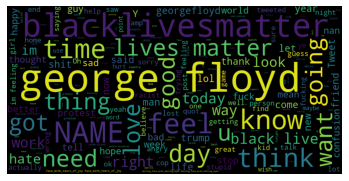

In [83]:
preprocessing(df)   

In [84]:
df1 = df[df['Emotion_ID'] == 1].sample(10000)
df2 = df[df['Emotion_ID'] == 2].sample(8000)
df3 = df[df['Emotion_ID'] == 3].sample(10000)
df4 = df[df['Emotion_ID'] == 4].sample(10000)
df5 = df[df['Emotion_ID'] == 5].sample(9000)
df6 = df[df['Emotion_ID'] == 6].sample(9000)
df7 = df[df['Emotion_ID'] == 7].sample(4000)

In [85]:
df_train = df1.append(df2)
df_train = df_train.append(df3)
df_train = df_train.append(df4)
df_train = df_train.append(df5)
df_train = df_train.append(df6)
df_train = df_train.append(df7)

In [86]:
df_train

,Emotion,Emotion_ID,text,hashtag_count,mentions_count,word_counts,average_word_len,stopword_count,email_counts
19748,anger,1,hate tell george floyd,0,0,12,3.583333,8,0
4355,anger,1,WHAT THE HELL IS THAT?!?!?!,0,0,5,4.600000,0,0
13311,anger,1,angry bby angry what. study,0,0,14,3.642857,9,0
2783,anger,1,"As polluted body copious amounts sugar, I some...",0,0,26,4.692308,12,0
16792,anger,1,chandler bing m ryan find annoying,0,0,8,4.125000,2,0
...,...,...,...,...,...,...,...,...,...
125342,surprise,7,"Fuck, I cut finger!",0,0,5,3.600000,1,0
124661,surprise,7,@sydthekid sad?!,0,1,5,4.800000,3,0
125516,surprise,7,omg pain ouchies,0,0,8,2.777778,5,0
127796,surprise,7,All I saw [NAME],0,0,5,3.200000,1,0


In [87]:
df_y = df_train['Emotion_ID']

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
text_counts = cv.fit_transform(df_train['text'])
text_counts.toarray().shape

(60000, 5000)

In [89]:
df_bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())  # bag of words

In [90]:
#df_bow

In [91]:
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [92]:
X, y = (df_bow, df_y)

In [93]:
%%time
X, y = (df_bow, df_y)
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
svm=LinearSVC(random_state=2,max_iter=2000)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("SVM ---->",acc)

SVM ----> 0.6686666666666666
Wall time: 1min 19s


In [94]:
confusion_matrix(y_pred, y_test)

array([[1333,  109,   64,   64,  145,  106,   38],
       [ 136, 1141,  118,   27,   55,   33,   45],
       [ 103,  114, 1644,   25,   42,   60,   36],
       [  82,   32,   44, 1422,  246,  126,  124],
       [ 229,  118,   92,  290, 1130,  275,  227],
       [ 106,   48,   59,   87,  139, 1105,   47],
       [  39,   34,   24,   54,   84,   50,  249]], dtype=int64)

In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.66      0.72      0.69      1859
           2       0.71      0.73      0.72      1555
           3       0.80      0.81      0.81      2024
           4       0.72      0.68      0.70      2076
           5       0.61      0.48      0.54      2361
           6       0.63      0.69      0.66      1591
           7       0.33      0.47      0.38       534

    accuracy                           0.67     12000
   macro avg       0.64      0.66      0.64     12000
weighted avg       0.67      0.67      0.67     12000



Trend :  Al Franken
Trend :  Yashar Ali
                                                 text
0   @rohitrajoffici5 @CricCrazyJohns Ipl nibbas li...
1   @Mahi_1732001 @CricCrazyJohns @adithya_electro...
2   he carried last ipl kkr with his batting\nhe h...
3   @niran86000397 @CricCrazyJohns @adithya_electr...
4   Breaking news \n2022 ipl new team is going to ...
5   @jojobangtanvv @filterkims @EgosShadow7 One of...
6   Looks like IPL will continue with no overseas ...
7   @rajasthanroyals @DavidMillerSA12 Happy Birthd...
8                         I miss the IPL so fckn much
9   @SingbalSanket Are the fringe players going at...
10  Yashar Ali: The Curious Rise of a Twitter Powe...
11      Yashar Ali and Virgil Texas in one day oh boy
12  celebrity deaths come in threes - art decider,...
13  Remember how everyone was curious how Kato Kae...
14  I'm sure this is being shared left and right b...
15    yashar ali’s profile photo is the greatest scam
16  skimming this glowing profile of yasha

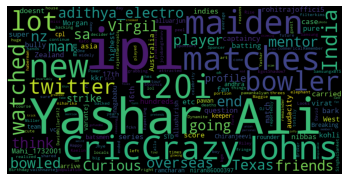

In [96]:
q = world_trends[0]['trends'][random.randint(0,len(world_trends[0]['trends']))]['name']
print("Trend : ",q)
tweets = twitter_api.search.tweets(q='IPL' + '-filter:retweets', lang='en' ,count=10, tweet_mode='extended')
query_tweets=[]
for i in range(len(tweets['statuses'])):
    query_tweets.append(tweets['statuses'][i]['full_text'])

# collecting tweets from another trends
q = world_trends[0]['trends'][random.randint(0,len(world_trends[0]['trends']))]['name']
print("Trend : ",q)
tweets = twitter_api.search.tweets(q=q + '-filter:retweets', lang='en' ,count=10, tweet_mode='extended')
for i in range(len(tweets['statuses'])):
    query_tweets.append(tweets['statuses'][i]['full_text'])


query_df = pd.DataFrame(query_tweets)
query_df.columns = ['text']
print(query_df)
new_df = query_df.copy(deep=True)
tweets_df = preprocessing(new_df)

In [97]:
text_counts = cv.transform(tweets_df['text'])
text_counts.toarray().shape
test = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [98]:
result = svm.predict(test)

In [99]:
result

array([3, 5, 6, 5, 4, 5, 5, 4, 6, 5, 7, 7, 4, 7, 3, 6, 7, 2, 5, 4],
      dtype=int64)

In [100]:
emotion = [None] * len(new_df)
for i in range(len(result)):
  if (result[i] == 1):
    emotion[i] = 'Anger'
  elif (result[i] == 2):
    emotion[i] = 'Disgust'
  elif (result[i] == 3):
    emotion[i] = 'Fear'
  elif (result[i] == 4):
    emotion[i] = 'Happy'
  elif (result[i] == 5):
    emotion[i] = 'Neutral'
  elif (result[i] == 6):
    emotion[i] = 'Sad'
  elif (result[i] == 7):
    emotion[i] = 'Surprise'

In [101]:
query_df['Emotion'] = emotion
query_df['Emotion_ID'] = result

In [102]:
for i in range(len(result)):
    if result[i] == 1:
        print(query_df['text'][i], '--------------   anger')
    elif result[i] == 2:
        print(query_df['text'][i],'--------------   disgust')
    elif result[i] == 3:
        print(query_df['text'][i],'--------------   fear')
    elif result[i] == 4:
        print(query_df['text'][i],'--------------   happy')
    elif result[i] == 5:
        print(query_df['text'][i],'--------------   neutral')
    elif result[i] == 6:
        print(query_df['text'][i],'--------------   sad')
    elif result[i] == 7:
        print(query_df['text'][i],'--------------   surprise')
    print('****************************************************************************************************************************\n')

@rohitrajoffici5 @CricCrazyJohns Ipl nibbas like you just watched few ipl matches and bark on twitter 😂 Morgan has hundreds in India Australia West indies New Zealand etc and audacity of you too question his captaincy being virat fan 😂 --------------   fear
****************************************************************************************************************************

@Mahi_1732001 @CricCrazyJohns @adithya_electro That's super over maiden.
He has bowled a maiden in The 16th or 17th over of an IPL match --------------   neutral
****************************************************************************************************************************

he carried last ipl kkr with his batting
he has t20i 50 in india and mom too 
he has man of the series in sa and his highest t20i score is 91 in nz
in that case kohli doesnt even have t20i 50 in sa nz he is pure asia bully https://t.co/NqRBeD0Itp --------------   sad
************************************************************

In [103]:
# if  working  google  colab
# query_df.to_csv('/content/drive/MyDrive/Mini_Project/Work/query_output.csv')
# else  if working  on  jupyter  notebook  offline
query_df.to_csv('./query_output.csv')

(array([2., 6., 3., 4., 4., 1.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <BarContainer object of 6 artists>)

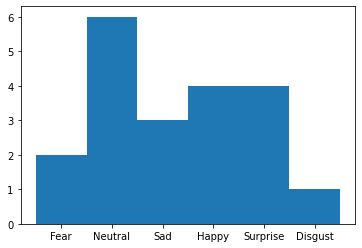

In [104]:
plt.hist(query_df['Emotion'], bins=range(len(pd.unique(query_df['Emotion']))+1), align="left")
#plt.hist(query_df['Emotion'], bins=range(6), align="left")